In [1]:
# import library
# model 설계
# data loading
# 초기 설정
# Training
# 실행

In [2]:
import numpy
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim  # gradient descent method
import torchvision.datasets as dset # MNIST
import torchvision.transforms as transforms # data를 훈련하기 위해서 관리하는 library
from torch.utils.data import DataLoader
from torch.autograd import Variable # numpy의 배열을 pytorch의 변수로 변환 -> 자동 미분하려고


In [3]:
# n_imput = 28 28 = 784
# 1st_hidden : 256
# 2nd hidden : 128
# n_output : 10

model = nn.Sequential(
    nn.Linear(784,256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Linear(128,10),
)

In [4]:
mnist_train = dset.MNIST(
    "",
    train=True,
    transform=transforms.ToTensor(),
    target_transform=None,
    download=True
    )
mnist_test = dset.MNIST(
    "",
    train=False,
    transform=transforms.ToTensor(),
    target_transform=None,
    download=True
    )

mnist_train의 길이: 60000
mnist_test의 길이: 10000
image의 크기: torch.Size([1, 28, 28])
label: 0
torch.FloatTensor


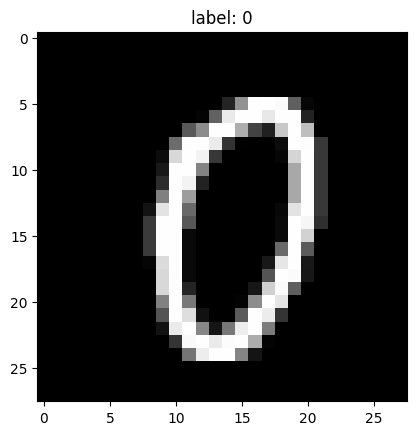

In [5]:
# data 확인

print("mnist_train의 길이:",len(mnist_train))
print("mnist_test의 길이:",len(mnist_test))

image, label = mnist_train.__getitem__(1000)
print("image의 크기:",image.size())
print("label:",label)

img = image.numpy()
print(image.type())

plt.title("label: %d" %label)
plt.imshow(img[0],cmap='gray')
plt.show()



In [6]:
# batch_size: 한 번에 훈련할 데이터의 양
batch_size = 1024
# learning_rate
learning_rate = 0.002
# epoch
num_epoch = 500

In [7]:
train_loader = DataLoader(mnist_train,
                          batch_size = batch_size,
                          shuffle=True,
                          num_workers=2,
                          drop_last=True)
test_loader = DataLoader(mnist_test,
                         batch_size = batch_size,
                         shuffle=False,
                         num_workers = 2,
                         drop_last=True)


In [8]:
criterion  = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [9]:
def ComputeAccuracy(dloader, imodel):
  total = 0
  correct = 0

  for j,[imgs, labels] in enumerate(dloader):
    img = imgs
    label = Variable(labels)
    img = Variable(img, requires_grad= False)
    # print(img.shape)
    # 1024 1 28 28 -> 1024 784 (28 28)
    img = img.reshape((img.shape[0],img.shape[2]*img.shape[3]))
    # print(img.shape)
    #img = img.reshape((img.shape[0],img.shape[1]*img.shape[2]))
    # print(img.shape)
    output = imodel(img)
    _, output_index = torch.max(output, 1)
    total += label.size(0)
    correct += (output_index == label).sum().float()

  print("Accuracy: {}" .format(100*correct/total))




In [10]:
ComputeAccuracy(test_loader,model)    # 1/10 = 약 10% => 찍으면 대충 10%나옴

Accuracy: 11.295573234558105


In [11]:
for i in range (num_epoch):
  for j, [imgs,labels] in enumerate(train_loader):
    img = imgs
    label = Variable(labels)

    img = img.reshape((img.shape[0],img.shape[2]*img.shape[3]))
    img = Variable(img, requires_grad=True)

    optimizer.zero_grad()
    output = model(img)
    loss = criterion(output,label)

    loss.backward()
    optimizer.step()
  if (i%10 ==0):
    print("%d.." %i)
    ComputeAccuracy(test_loader,model)
    print(loss)



0..
Accuracy: 11.295573234558105
tensor(2.3073, grad_fn=<NllLossBackward0>)
10..
Accuracy: 11.469183921813965
tensor(2.2849, grad_fn=<NllLossBackward0>)
20..
Accuracy: 14.33376693725586
tensor(2.2711, grad_fn=<NllLossBackward0>)
30..
Accuracy: 22.35243034362793
tensor(2.2520, grad_fn=<NllLossBackward0>)
40..
Accuracy: 30.88107681274414
tensor(2.2443, grad_fn=<NllLossBackward0>)
50..
Accuracy: 39.40972137451172
tensor(2.2109, grad_fn=<NllLossBackward0>)
60..
Accuracy: 46.2890625
tensor(2.1782, grad_fn=<NllLossBackward0>)
70..
Accuracy: 50.98741149902344
tensor(2.1488, grad_fn=<NllLossBackward0>)
80..
Accuracy: 54.21006774902344
tensor(2.0969, grad_fn=<NllLossBackward0>)
90..
Accuracy: 56.43446350097656
tensor(1.9991, grad_fn=<NllLossBackward0>)
100..
Accuracy: 57.56293487548828
tensor(1.9276, grad_fn=<NllLossBackward0>)
110..
Accuracy: 59.5703125
tensor(1.8154, grad_fn=<NllLossBackward0>)
120..
Accuracy: 61.69704818725586
tensor(1.6917, grad_fn=<NllLossBackward0>)
130..
Accuracy: 63.682

In [12]:
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [13]:
label

tensor([2, 8, 7,  ..., 8, 7, 7])